In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [4]:
S0 = 100
X = 100
T = 1
volatility = 0.2
r = 0.05

In [5]:
def stockPrice(S0,T,volatility,r):
    n = 252
    dT = T / n
    S = np.zeros((n,1))
    S[0] = S0
    for i in range(n - 1):
        z = np.random.normal(0,1)
        dW = z * np.sqrt(dT)
        S[i + 1] = S[i] + r * S[i] * dT + volatility * S[i] * dW
    return S

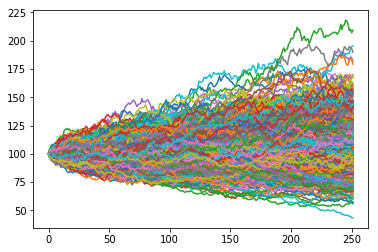

In [6]:
###Simulation 1000
simulation = 1000
for i in range(simulation):
    plt.plot(stockPrice(S0,T,volatility,r))

In [7]:
def endPrice(sim,S0,T,volatility,r):
    finalPrice = np.zeros((sim,1))
    for i in range(sim):
        finalPrice[i] = stockPrice(S0,T,volatility,r)[251]
    return finalPrice

In [11]:
finalPrice = endPrice(1000,S0,T,volatility,r)

In [21]:
def callPrice(finalPrice,X):
    callPrice = np.zeros((len(finalPrice),1))
    for i in range(len(finalPrice)):
        if finalPrice[i] <= X:
            callPrice[i] = 0
        else:
            callPrice[i] = 50
    return np.mean(callPrice)

In [22]:
callPrice(finalPrice,100)

28.85

In [23]:
def putPrice(finalPrice,X):
    putPrice = np.zeros((len(finalPrice),1))
    for i in range(len(finalPrice)):
        if finalPrice[i] <= X:
            putPrice[i] = 50
        else:
            putPrice[i] = 0
    return np.mean(putPrice)

In [24]:
putPrice(finalPrice,100)

21.15